In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)

In [3]:
# Labeled training set
training_images = images[:300]
training_labels = labels[:300]
# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

train_i = training_images.transpose()
train_l = training_labels.transpose()

test_i = test_images.transpose()
test_l = test_labels.transpose()

In [4]:
training_mean = np.array([[np.mean(x)] for x in train_i])
print(train_i.shape)
print(training_mean.shape)

(64, 300)
(64, 1)


In [5]:
U,S_t,Vh = np.linalg.svd(train_i - training_mean, full_matrices=True)
P2 = U.transpose()[:2].transpose()
Xfeat = np.matmul(P2.transpose(), train_i - training_mean)
Xhat = np.matmul(P2, np.matmul(P2.transpose(), train_i - training_mean)) + training_mean

(2, 300)


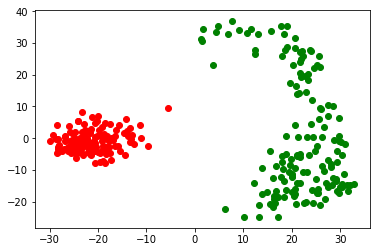

In [6]:
print(Xfeat.shape)
Xfeat0 = []
Xfeat1 = []
for i in range(300):
    #print(train_l[i])
    if train_l[i] == 0:
        Xfeat0.append(Xfeat.transpose()[i])
    elif train_l[i] == 1:
        Xfeat1.append(Xfeat.transpose()[i])
X0 = np.array(Xfeat0).transpose()
X1 = np.array(Xfeat1).transpose()
plt.scatter(X0[0], X0[1], color='r')
plt.scatter(X1[0], X1[1], color='g')

In [7]:
def get_closest_indices(neighbors, pt, training):
    distances = []
    for train in training:
        distances.append(np.linalg.norm(pt - train))
    return np.array(distances).argsort()[:neighbors]

def kNN(neighbors, data, training_data, training_labels):
    kNN_labels = []
    i = 0
    for d in data:
        closest = get_closest_indices(neighbors, d, training_data)
        #print(train_l[closest], test_l[i])
        if sum(training_labels[closest])>neighbors/2:
            #print(train_l[closest], test_l[i], 1)
            kNN_labels.append(1)
        else:
            #print(train_l[closest], test_l[i], 0)
            kNN_labels.append(0)
        i+=1
    
    return np.array(kNN_labels)
    
    

In [8]:
U_test,S_test,V_htest = np.linalg.svd(test_i - training_mean, full_matrices='True')

P_test2 = U_test.transpose()[:2].transpose()

Xtestfeat = np.matmul(P_test2.transpose(), test_i - training_mean)
#print(Xfeat.transpose()[closest])
#print(train_l[closest])

k5NN_labels = kNN(5, Xtestfeat.transpose(), Xfeat.transpose(), train_l)




In [9]:
#def errorplot(NNlabels, real_labels):
#    comparison = NNlabels - real_labels
#    error_indices = np.where(comparison != 0)[0]
#    correct_indices = np.where(comparison == 0)[0]
#    
#    return len(error_indices)

0.0


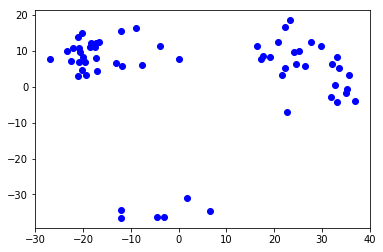

In [10]:
#numerrors = errorplot(k5NN_labels, test_l)

comparison = k5NN_labels - test_l
error_indices = np.where(comparison != 0)[0]
correct_indices = np.where(comparison == 0)[0]
plt.scatter(Xtestfeat.transpose()[correct_indices].transpose()[0], Xtestfeat.transpose()[correct_indices].transpose()[1], color='b')
plt.scatter(Xtestfeat.transpose()[error_indices].transpose()[0], Xtestfeat.transpose()[error_indices].transpose()[1], color='k')


error = 1/60 * len(error_indices)
print(error)

In [11]:
total_energy = np.linalg.norm(train_i - training_mean, 'fro')**2
cum_energy = 0
i = 0
while cum_energy < .95*total_energy:
    cum_energy+=S_t[i]*S_t[i]
    i+=1


In [12]:
#i  = 2
Pi = U.transpose()[:i].transpose()
Xifeat = np.matmul(Pi.transpose(), train_i - training_mean)

P_testi = U_test.transpose()[:i].transpose()
Xtestfeati = np.matmul(P_testi.transpose(), test_i-training_mean)

In [13]:
errorlist = []
klist = [1, 3, 5, 7, 9]
for i in klist:
    kNN_labels = kNN(i, Xtestfeati.transpose(), Xifeat.transpose(), train_l)
    #numerrors = errorplot(kNN_labels, test_l)
    print('Errors: ', kNN_labels - test_l)
    error_indices = np.where(kNN_labels - test_l != 0)[0]
    error = 1/60 * len(error_indices)
    print('Average error: ', error)
    errorlist.append(error)

Errors:  [ 0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Average error:  0.03333333333333333
Errors:  [ 0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Average error:  0.03333333333333333
Errors:  [ 0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Average error:  0.03333333333333333
Errors:  [ 0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Average error:  0.03333333333333333
Errors:  [ 0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  

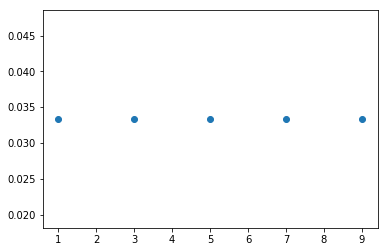

In [14]:
plt.scatter(klist, errorlist)

#since the error does not seem to decrease with increased k, I would recommend using k = 1 to reduce the computational complexity